SPoleAitkens with 2500.0 km final crater diameter
 inverse scaling law -> 248.6 km asteroid diameter
 closest sim -> 200km.dat
 (sim has 2149.3 km final crater diameter)

Nubium with 690.0 km final crater diameter
 inverse scaling law -> 39.0 km asteroid diameter
 closest sim -> 40km.dat
 (sim has 702.1 km final crater diameter)

Birkoff with 330.0 km final crater diameter
 inverse scaling law -> 13.5 km asteroid diameter
 closest sim -> 15km.dat
 (sim has 338.4 km final crater diameter)

Ingenii with 320.0 km final crater diameter
 inverse scaling law -> 12.9 km asteroid diameter
 closest sim -> 15km.dat
 (sim has 338.4 km final crater diameter)

AmundsenG with 340.0 km final crater diameter
 inverse scaling law -> 14.1 km asteroid diameter
 closest sim -> 15km.dat
 (sim has 338.4 km final crater diameter)

CrugerS with 270.0 km final crater diameter
 inverse scaling law -> 10.1 km asteroid diameter
 closest sim -> 10km.dat
 (sim has 267.9 km final crater diameter)

Smythii with 880.0

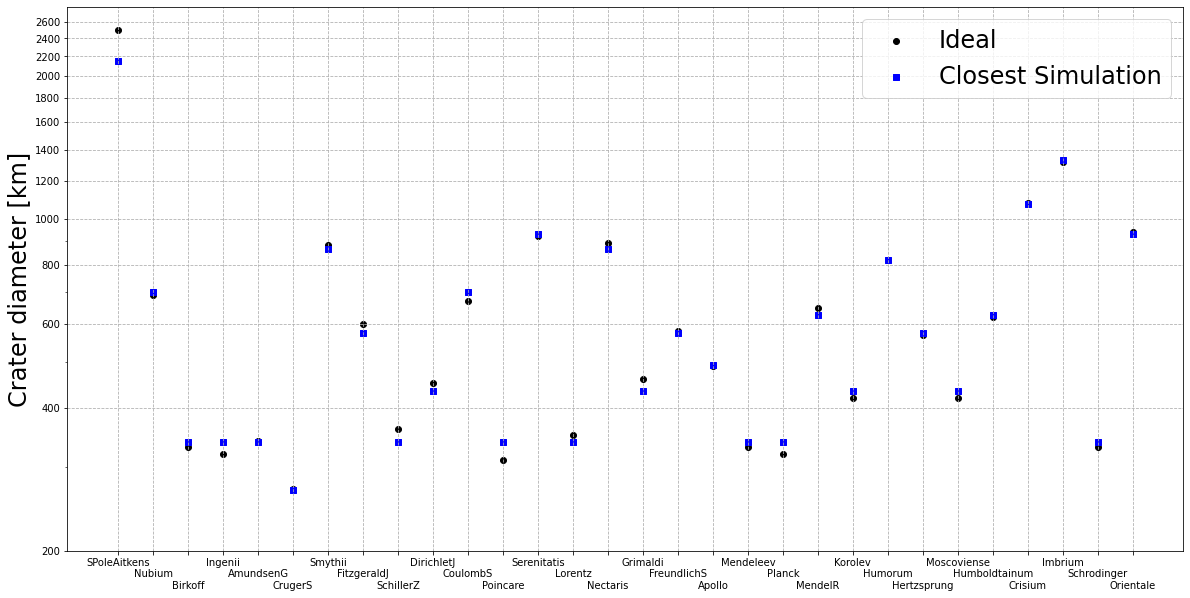

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interp
import scipy.integrate as integrate
from function_library_3 import trim, scaling_law, asteroid_diameter

import os,glob
try:
    os.mkdir('1_Basin_Data')
except:
    for filename in glob.glob('1_Basin_Data/*'):
        os.remove(filename)

fig = plt.figure(figsize=(20,10),facecolor='white')
plt.scatter([],[],color='black',marker='o',label='Ideal')
plt.scatter([],[],color='blue',marker='s',label='Closest Simulation')
plt.ylabel('Crater diameter [km]',fontsize=24)
x = 0 
names = []

#================================================================================
# Define nearest neighbor function

def nearest_neighbor(x,file_list):
    dif = np.inf
    for each in file_list: # uses the scaling law to map each basin to its respective data file
        ast_diameter = asteroid_diameter('0_Prime_Data/'+each)
        if np.absolute(ast_diameter-x) < dif:
            dif = np.absolute(ast_diameter-x)
            closest = each
            d = ast_diameter
    print(f' closest sim -> {closest}\n (sim has {scaling_law(d):0.01f} km final crater diameter)\n')
    return closest

#================================================================================

# Open the user input file with the information from each basin
input_file = open('Basins.txt','r')
basins = []
line = 1,' '
while line[0:3] != 'END':
    line = input_file.readline()
    if line[0:1] == 'B':
        basins.append(trim(line.split(':'))) 

generic_data = []
for filename in os.listdir('0_Prime_Data'):
    if filename.endswith(".dat"):
        generic_data.append(filename)    
        
for each in basins: # map each user defined basin to its closest matching premade data file
    print(f'{each[0]} with {each[3]} km final crater diameter\n inverse scaling law -> {scaling_law(each[3],inverse=True):0.01f} km asteroid diameter')
    
    names.append((x%3)*'\n'+each[0])
    
    plt.scatter(x,each[3],color='black',marker='o')
    
    near_nei = nearest_neighbor(scaling_law(each[3],inverse=True),generic_data)
    
    in_ = open('0_Prime_Data/{}'.format(near_nei),'r+')
    
    plt.scatter(x,scaling_law( asteroid_diameter('0_Prime_Data/'+near_nei) ),color='blue',marker='s')
    plt.legend(fontsize=24)
    x += 1
    
    try:
        out_ = open('1_Basin_Data/{}.dat'.format(each[0]),'x')
    except:
        out_ = open('1_Basin_Data/{}.dat'.format(each[0]),'r+')
        out_.truncate(0)
    for i in range(18):
        out_.write(in_.readline())
    in_.close() ; out_.close()

plt.yscale('log')
plt.xticks(list(range(x)),names)
plt.yticks(list(range(200,2800,200)),list(range(200,2800,200)))
plt.grid(True, ls='--', zorder=-15);

These matches are only used when there is a need to plot discreet data of each simulation. 
The KDEs for each impact basin are made from interpolation of the closest 2 simulations. 
Therefore this matching is mostly made obsolete in later steps.
However, the code is still open to integrating a custom impact ejecta.dat if neccessary, in which case the interpolation in the next notebook wont be necessary for that specific impact event.

In [2]:
scaling_law(70)

1036.0239781689309